<a href="https://colab.research.google.com/github/FadeZx/DT-467_ChessMoveTracking/blob/Board-detection/2_2024_DT_467_ChessMove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset preparation / Preprocessing

In [ ]:
#import dataset1 no oriented
!pip install -U gdown
!gdown --folder https://drive.google.com/drive/folders/1b91n0hFcaaPfefFwzlpWX9hyT6JoR7DH

Retrieving folder contents
Processing file 1PVeMgv5z_Ua3T33htKAFX27jkkOPHTM_ frame0 copy.jpg
Processing file 1Jf6DfOn-R0wNqqCqRjFNtk92x5p6hQud frame0.jpg
Processing file 1w_2N7QDqXJ472ka2YFFAmFhc3h1NreW7 frame1.jpg
Processing file 1vE7q6qMD_xz8dAvpcEYHL1zC1CspNwPa frame25.jpg
Processing file 1AEwovovfqBF7DAkTzhdEM4aAYqC7txC4 frame56.jpg
Processing file 1Zn6g5-GmlMEYDWtzt1eX90b0XWahd91Q frame75.jpg
Processing file 1METUm9TQIcKrt-T-1IUDBV_AABLlKct0 frame98.jpg
Processing file 1HH6P0Ia7of14ZfqPjwnMZuF-CZksu7l5 frame115.jpg
Processing file 1AnbrrLArLNQMsFsaLytmqi7L_YQ7tiSV frame160.jpg
Processing file 1SKaSwqWeZ3s4KQn_X7eFOOeMJd_6QFbD frame207.jpg
Processing file 18RpEPCsn4FUu4qOX3ZHPcJL2MMAPj9vk frame212.jpg
Processing file 1ESe7MZdAE6bbxfU7cejVqX-yw5Z5z0CE frame242.jpg
Processing file 1GKDD-TBlJ4khkExmdHDArY_tF_YX2dvm frame274.jpg
Processing file 19RXLuPMF11k3_0ExXxtC69o0yY4uQF4y frame386.jpg
Processing file 1c3XJICbzfRU7uFs2k2hOGFBvfstag0-j frame393.jpg
Processing file 1N15LAr7e3G6_re4n

In [ ]:
#import dataset2
!gdown --folder https://drive.google.com/drive/folders/1-NaFCqOomOCt5EpskeDT7ez1_DZ_8k3m

Retrieving folder contents
Processing file 1sw65JD2BTd6b24ZpiMPrdlT8ckvBI1hq frame0.jpg
Processing file 1U1DJyDGWuZTt6NWBym1LsdVNK2yIwYkX frame55.jpg
Processing file 1fPd0Lz1UfnW9_upQgWLJ88GTQgB-mPZE frame56.jpg
Processing file 1kGfo6dLN1r7jxE1I9gkHV6yg4zkc5UtW frame57.jpg
Processing file 1xfroP4wMUfdZQmhCnuMHlStbhnxgfY-t frame58.jpg
Processing file 1tvoxfNZ2GMn8AXzukujHpGgRf7MnVTcO frame59.jpg
Processing file 1dSX1jhIAd2Qzhn2H1Vg_EeQsdZPZKTVh frame65.jpg
Processing file 1YUHENekfVEOntvmrjN3YVw78W5YpIGoQ frame66.jpg
Processing file 1U4_aK_ElkDd5jLTmnL8ErH0AjTzmB0zH frame70.jpg
Processing file 1sVsDBEOa3P-bUaL3fLpQxiVjM7cFB4oW frame75.jpg
Processing file 1oaQ2XhaxxuQIN21uQd89L7o5PTHA9C_v frame101.jpg
Processing file 1dgHlb1EYu1hEqm_axz1ODmwqIlCSPZrT frame155.jpg
Processing file 15jYU9ZE6YIAI4acgKym5tmzadMoPE93U frame159.jpg
Processing file 1g3JN_NMHdPKmwrME2q9ff6PIrM5Q0f85 frame173.jpg
Processing file 182W7crKEvSJXevr0Jye3eLZCRknwvM22 frame183.jpg
Processing file 1hUuj4SuLqMOyzrrFAggJtS

In [ ]:
!wget https://drive.google.com/uc?id=17SQJv256LRXrUni_9Y8aJ-sqztSQ1rGw -O frame_0.jpg

--2025-04-24 06:36:10--  https://drive.google.com/uc?id=17SQJv256LRXrUni_9Y8aJ-sqztSQ1rGw
Resolving drive.google.com (drive.google.com)... 108.177.98.113, 108.177.98.139, 108.177.98.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.98.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=17SQJv256LRXrUni_9Y8aJ-sqztSQ1rGw [following]
--2025-04-24 06:36:10--  https://drive.usercontent.google.com/download?id=17SQJv256LRXrUni_9Y8aJ-sqztSQ1rGw
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.195.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12515281 (12M) [image/png]
Saving to: ‘frame_0.jpg’

frame_0.jpg         100%[===================>]  11.93M  29.7MB/s    in 0.4s    

2025-04-24 06:36:15 (29.7 MB/s) - ‘frame_0.jpg’ s

In [6]:
#import dataset2 only RGB image oriented
!wget https://drive.google.com/uc?id=1PVeMgv5z_Ua3T33htKAFX27jkkOPHTM_ -O frame_0.jpg
!wget https://drive.google.com/uc?id=1vE7q6qMD_xz8dAvpcEYHL1zC1CspNwPa -O frame_25.jpg
!wget https://drive.google.com/uc?id=1METUm9TQIcKrt-T-1IUDBV_AABLlKct0 -O frame_98.jpg
!wget https://drive.google.com/uc?id=1AnbrrLArLNQMsFsaLytmqi7L_YQ7tiSV -O frame_160.jpg
!wget https://drive.google.com/uc?id=18RpEPCsn4FUu4qOX3ZHPcJL2MMAPj9vk -O frame_212.jpg
!wget https://drive.google.com/uc?id=19RXLuPMF11k3_0ExXxtC69o0yY4uQF4y -O frame_386.jpg
!wget https://drive.google.com/uc?id=11QnEx8AlLdcIMJZPeCY_Gb8YzB4i_rrs -O frame_471.jpg
!wget https://drive.google.com/uc?id=1asMzKguloR7uNA6kB5JpFki2SaFL8f7K -O frame_935.jpg
!wget https://drive.google.com/uc?id=1Js08IbU-jfzT7q960kIOWXHV4YcSgK1w -O frame_1149.jpg
!wget https://drive.google.com/uc?id=1jV00hYmoqeOW8cJgvp-LdJYJgfstMONm-O frame_1183.jpg

--2025-04-27 06:16:29--  https://drive.google.com/uc?id=1PVeMgv5z_Ua3T33htKAFX27jkkOPHTM_
Resolving drive.google.com (drive.google.com)... 74.125.137.139, 74.125.137.102, 74.125.137.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.137.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1PVeMgv5z_Ua3T33htKAFX27jkkOPHTM_ [following]
--2025-04-27 06:16:29--  https://drive.usercontent.google.com/download?id=1PVeMgv5z_Ua3T33htKAFX27jkkOPHTM_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198855 (194K) [image/jpeg]
Saving to: ‘frame_0.jpg’

frame_0.jpg         100%[===================>] 194.19K  --.-KB/s    in 0.05s   

2025-04-27 06:16:32 (3.76 MB/s) - ‘frame_0.jpg’ s

In [ ]:
!pip install easyocr
!pip install ultralytics
!pip install --force-reinstall --no-cache-dir pandas


  Using cached easyocr-1.7.2-py3-none-any.whl.metadata (10 kB)
  Using cached python_bidi-0.6.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Import chess corner dataset and extract

In [1]:
!pip install -q gdown

# Correct file_id only
file_id = "1pbFb6THRwvpl0pYI7CjHww6L8lNx-ZOJ"

# Correct usage
!gdown {file_id} --fuzzy -O chessboard_detection.zip

# Then unzip
!unzip chessboard_detection.zip -d chessboard_data

print("✅ Unzipped successfully!")


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    response = self._make_request(
               ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 516, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 1395, in getresponse
    response.begin()
  File "/usr/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr

Trainning

In [20]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(
    data='/content/chessboard_data/data.yaml',
    epochs=6,
    imgsz=640,
    batch=16,
    fraction=0.5,
    name='chessboard_detector'
)


Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/chessboard_data/data.yaml, epochs=6, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=chessboard_detector5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=0.5, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

train: Scanning /content/chessboard_data/train/labels... 10502 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10502/10502 [00:07<00:00, 1496.42it/s]


train: New cache created: /content/chessboard_data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 476.4±273.7 MB/s, size: 79.8 KB)


val: Scanning /content/chessboard_data/valid/labels.cache... 0 images, 77 backgrounds, 0 corrupt: 100%|██████████| 77/77 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/chessboard_data/valid/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to runs/detect/chessboard_detector5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/chessboard_detector5
Starting training for 6 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/6      2.15G      2.845      3.137      1.494         20        640: 100%|██████████| 657/657 [03:19<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]

                   all         77          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:655: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/6      2.15G      2.568      1.968      1.362         12        640: 100%|██████████| 657/657 [03:11<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.96it/s]

                   all         77          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:655: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/6      2.15G      2.461      1.796      1.322         19        640: 100%|██████████| 657/657 [03:09<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all         77          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:655: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/6      2.15G      2.349      1.657      1.284         26        640: 100%|██████████| 657/657 [03:07<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.75it/s]

                   all         77          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:655: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/6      2.15G      2.252      1.559      1.243         16        640: 100%|██████████| 657/657 [03:07<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]

                   all         77          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:655: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/6      2.15G      2.153      1.437      1.206         25        640: 100%|██████████| 657/657 [03:08<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all         77          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:655: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



6 epochs completed in 0.320 hours.
Optimizer stripped from runs/detect/chessboard_detector5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/chessboard_detector5/weights/best.pt, 6.2MB

Validating runs/detect/chessboard_detector5/weights/best.pt...
Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:491: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:526: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:526: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_met

                   all         77          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:655: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index


Speed: 0.3ms preprocess, 3.3ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/chessboard_detector5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([], dtype=int64)
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x798c10e42b90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [8]:
def detect_board_labels(img, reader, conf_thresh=0.4):
    """
    Detect letters/numbers (a–h, 1–8) using EasyOCR.

    Parameters:
    - img: input BGR image (OpenCV)
    - reader: EasyOCR Reader object
    - conf_thresh: minimum confidence to keep text

    Returns:
    - filtered_labels: list of tuples (label_text, bbox)
    - img_annotated: image with drawn labels for visualization
    """
    results = reader.readtext(img)
    filtered_labels = []

    img_annotated = img.copy()

    for (bbox, text, conf) in results:
        text = text.strip().lower()
        if conf >= conf_thresh and text in ['a','b','c','d','e','f','g','h','1','2','3','4','5','6','7','8']:
            filtered_labels.append((text, bbox))

            # Draw the label and box
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = tuple(map(int, top_left))
            bottom_right = tuple(map(int, bottom_right))

            cv2.rectangle(img_annotated, top_left, bottom_right, (0, 255, 0), 2)
            cv2.putText(img_annotated, text.upper(), top_left, cv2.FONT_HERSHEY_SIMPLEX,
                        0.8, (255, 0, 0), 2)

    return filtered_labels, img_annotated


In [9]:
def find_correct_orientation(img, reader):
    rotations = [0, 90, 180, 270]
    best_rotation = 0
    max_label_confidence = -1

    for angle in rotations:
        if angle == 0:
            rotated = img.copy()
        elif angle == 90:
            rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        elif angle == 180:
            rotated = cv2.rotate(img, cv2.ROTATE_180)
        elif angle == 270:
            rotated = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

        results = reader.readtext(rotated)
        img_h = rotated.shape[0]

        for (bbox, text, conf) in results:
            text = text.strip().lower()
            if any(c in text for c in ['1', 'a', '8', 'h']) and conf > 0.4:
                avg_y = np.mean([pt[1] for pt in bbox])
                if avg_y > img_h * 0.6:
                    if conf > max_label_confidence:
                        max_label_confidence = conf
                        best_rotation = angle

    if best_rotation == 90:
        return cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    elif best_rotation == 180:
        return cv2.rotate(img, cv2.ROTATE_180)
    elif best_rotation == 270:
        return cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    else:
        return img

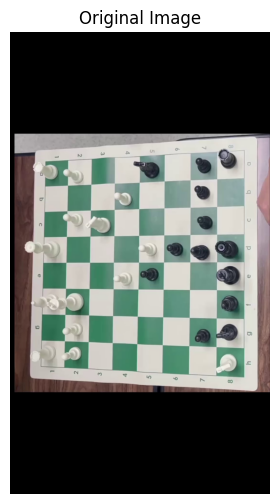

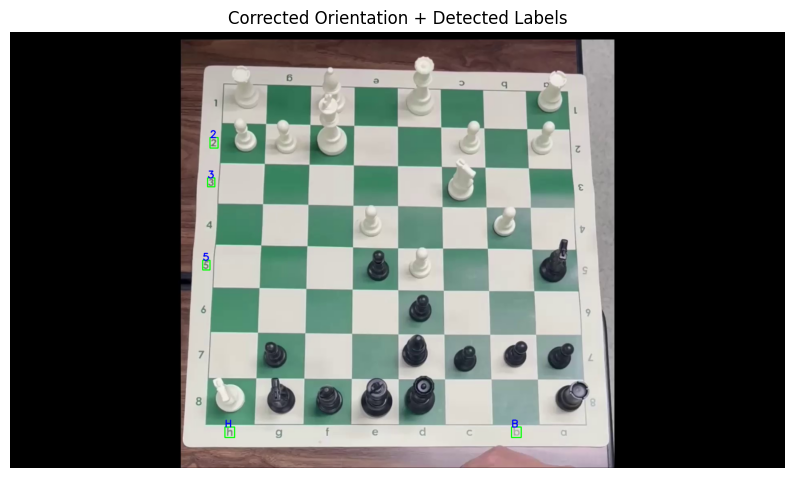

✅ Final labels after orientation correction: [('2', [[np.int32(495), np.int32(261)], [np.int32(515), np.int32(261)], [np.int32(515), np.int32(287)], [np.int32(495), np.int32(287)]]), ('3', [[np.int32(489), np.int32(361)], [np.int32(507), np.int32(361)], [np.int32(507), np.int32(383)], [np.int32(489), np.int32(383)]]), ('5', [[np.int32(477), np.int32(565)], [np.int32(495), np.int32(565)], [np.int32(495), np.int32(589)], [np.int32(477), np.int32(589)]]), ('h', [[np.int32(532), np.int32(978)], [np.int32(556), np.int32(978)], [np.int32(556), np.int32(1004)], [np.int32(532), np.int32(1004)]]), ('b', [[np.int32(1242), np.int32(978)], [np.int32(1266), np.int32(978)], [np.int32(1266), np.int32(1004)], [np.int32(1242), np.int32(1004)]])]


In [30]:
reader = easyocr.Reader(['en'], gpu=True)
# Load and pre-process
img = cv2.imread("frame_0.jpg")
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

#orientation correction using chess board labels
img_corrected = find_correct_orientation(img, reader)

labels, img_with_labels = detect_board_labels(img_corrected, reader)

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(img_with_labels, cv2.COLOR_BGR2RGB))
plt.title("Corrected Orientation + Detected Labels")
plt.axis("off")
plt.show()

print("✅ Final labels after orientation correction:", labels)

In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load trained model
model = YOLO('/content/runs/detect/chessboard_detector5/weights/best.pt')

# Already corrected image
# img_corrected = find_correct_orientation(img, reader)

# Last good corners backup
last_good_corners = None

# Run YOLO prediction
results = model.predict(source=img_corrected, imgsz=640, line_thickness=1, conf=0.25, save_txt=False, save=False)

# Extract detected corners
all_corners = []
for r in results:
    for box in r.boxes.xyxy:  # boxes: (x1, y1, x2, y2)
        x1, y1, x2, y2 = box.tolist()
        cx = (x1 + x2) / 2
        cy = (y1 + y2) / 2
        all_corners.append([cx, cy])
all_corners = np.array(all_corners, dtype=np.float32)

print("Detected corners:", all_corners.shape)

# Helper: order points
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    diff = np.diff(pts, axis=1)
    rect[0] = pts[np.argmin(s)]  # top-left
    rect[2] = pts[np.argmax(s)]  # bottom-right
    rect[1] = pts[np.argmin(diff)]  # top-right
    rect[3] = pts[np.argmax(diff)]  # bottom-left
    return rect

# Helper: predict missing corner
def predict_missing_corner(pts):
    # Assume pts = 3 points
    A, B, C = pts

    # Find the missing D
    # If AB is one side, D = C + (A - B)
    D = C + (A - B)
    predicted_pts = np.vstack([pts, D])
    return predicted_pts

# Smart fallback
if len(all_corners) == 4:
    print("✅ 4 corners detected")
    ordered_corners = order_points(all_corners)
    last_good_corners = ordered_corners
elif len(all_corners) == 3:
    print("⚠️ Only 3 corners detected, predicting missing one...")
    predicted_corners = predict_missing_corner(all_corners)
    ordered_corners = order_points(predicted_corners)
    last_good_corners = ordered_corners
elif last_good_corners is not None:
    print("⚠️ Using last good corners!")
    ordered_corners = last_good_corners
else:
    raise Exception("❌ Cannot detect enough corners and no backup available.")

img_corners = img_corrected.copy()

# Draw detected corner points
for (x, y) in ordered_corners:
    cv2.circle(img_corners, (int(x), int(y)), 10, (0, 255, 0), -1)  # Green dots

# Draw big contour (the board rectangle)
pts = ordered_corners.reshape((-1, 1, 2)).astype(np.int32)
cv2.polylines(img_corners, [pts], isClosed=True, color=(255, 0, 0), thickness=3)  # Blue rectangle

# 🧩 Draw internal grid lines (8x8 squares)
# interpolate points between the corners
for i in range(1, 8):
    # Horizontal lines (left to right between top and bottom edges)
    pt1 = ordered_corners[0] + i / 8 * (ordered_corners[1] - ordered_corners[0])
    pt2 = ordered_corners[3] + i / 8 * (ordered_corners[2] - ordered_corners[3])
    cv2.line(img_corners, tuple(pt1.astype(int)), tuple(pt2.astype(int)), (0, 255, 255), 2)

    # Vertical lines (top to bottom between left and right edges)
    pt1 = ordered_corners[0] + i / 8 * (ordered_corners[3] - ordered_corners[0])
    pt2 = ordered_corners[1] + i / 8 * (ordered_corners[2] - ordered_corners[1])
    cv2.line(img_corners, tuple(pt1.astype(int)), tuple(pt2.astype(int)), (0, 255, 255), 2)

# 🔥 Now plot this!
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_corners, cv2.COLOR_BGR2RGB))
plt.title("📷 Corners + Board Outline + Segmentation Lines")
plt.axis('off')
plt.show()

# Warp the chessboard
def warp_chessboard(img, corners, output_size=640):
    src_pts = corners
    dst_pts = np.array([
        [0, 0],
        [output_size, 0],
        [output_size, output_size],
        [0, output_size]
    ], dtype=np.float32)

    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    warped = cv2.warpPerspective(img, M, (output_size, output_size))
    return warped

warped_board = warp_chessboard(img_corrected, ordered_corners)

# Show warped board
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(warped_board, cv2.COLOR_BGR2RGB))
plt.title('✅ Warped Chessboard')
plt.axis('off')
plt.show()

# Split the warped board into 8x8 cells
cell_size = warped_board.shape[0] // 8

squares = []
labels = []  # <-- add a label list

# Create mapping from (row,col) to board label
def square_label(row, col):
    file = chr(ord('a') + col)  # a,b,c,d,e,f,g,h
    rank = 8 - row  # 8,7,6...1
    return f"{file}{rank}"

for row in range(8):
    for col in range(8):
        x = col * cell_size
        y = row * cell_size
        square = warped_board[y:y+cell_size, x:x+cell_size]
        squares.append(((row, col), square))
        labels.append(square_label(row, col))  # save label

# ✅ Now visualize each cell nicely!
fig, axes = plt.subplots(8, 8, figsize=(12, 12))

for idx, ((row, col), square) in enumerate(squares):
    ax = axes[row, col]
    ax.imshow(cv2.cvtColor(square, cv2.COLOR_BGR2RGB))
    ax.set_title(labels[idx], fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()

print("📜 Board cell info:")
for idx, (label, cls) in enumerate(zip(labels, classes)):
    print(f"{label}: {cls}")

ModuleNotFoundError: No module named 'ultralytics'

# Main

In [ ]:
# Optional: print labels
print("✅ Final labels after orientation correction:", labels)# This function will be used for marking, do not change function name, input parameters and return parameters of this function
import cv2
import matplotlib.pyplot as plt
import numpy as np



def chess_move(video_name):
  # Input : video filename (.mp4)
  # Output : Chess moves for each video
  moves = ""
  i = 0

  # Create a VideoCapture object
  cap = cv2.VideoCapture(video_name)

  # Check if the video opened successfully
  if not cap.isOpened():
      print("Error opening video file")

  # Read and display frames until the video ends or 'q' is pressed
  while cap.isOpened():
    ret, frame = cap.read()
    if ret and i == 0:
        # Display only the first frame
        plt.imshow(frame[:,:,::-1])
        i += 1
    else:
        break

    # Release the video capture object and close display windows
    cap.release()

    # Write your code here to extract the move from the image

  return moves

# Marking

In [ ]:
!pip install editdistance
!pip install opencv-python

In [ ]:
!wget https://drive.google.com/uc?id=1a96Ei0hwfMvYUyUK-d0ZxvK6m6uSoAuR -O chess_solution_final_seen.csv

--2025-04-22 04:27:22--  https://drive.google.com/uc?id=1a96Ei0hwfMvYUyUK-d0ZxvK6m6uSoAuR
Resolving drive.google.com (drive.google.com)... 173.194.174.138, 173.194.174.139, 173.194.174.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.174.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1a96Ei0hwfMvYUyUK-d0ZxvK6m6uSoAuR [following]
--2025-04-22 04:27:23--  https://drive.usercontent.google.com/download?id=1a96Ei0hwfMvYUyUK-d0ZxvK6m6uSoAuR
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.189.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 963 [application/octet-stream]
Saving to: ‘chess_solution_final_seen.csv’

chess_solution_fina 100%[===================>]     963  --.-KB/s    in 0s      

2025-04-22 04:27:26 (40

## Download .mp4 file

In [ ]:
import subprocess

def download_file(url, filename=None):
    """
    Downloads a file from the specified URL using wget.

    Parameters:
        url (str): The URL of the file to download.
        output_directory (str, optional): The directory to save the downloaded file.
    """
    # Construct the wget command
    cmd = ['wget', url]
    if filename:
        cmd.extend(['-O', filename])

    try:
        # Execute the wget command
        print(cmd)
        subprocess.run(cmd, check=True)
        print(f"Downloaded {url} successfully.")
    except subprocess.CalledProcessError as e:
        print(f"An error occurred: {e}")


In [ ]:
# Load videos (or you can upload videos here manually)
f = open('chess_solution_final_seen.csv','r')

for line in f:
  video_name, moves_sol, p,link = line.split(',')
  idx = link.find('/d/')
  idx2 = link.find('/',idx+3)
  print(link[idx+3:idx2])
  url = 'https://drive.google.com/uc?id=' + link[idx+3:idx2]
  download_file(url, video_name)



nk
['wget', 'https://drive.google.com/uc?id=nk', '-O', 'row_id']
An error occurred: Command '['wget', 'https://drive.google.com/uc?id=nk', '-O', 'row_id']' returned non-zero exit status 8.
182pRqfn8ooNudYhsndYWgyBNi7rAV659
['wget', 'https://drive.google.com/uc?id=182pRqfn8ooNudYhsndYWgyBNi7rAV659', '-O', '2_Move_rotate_student.mp4']
Downloaded https://drive.google.com/uc?id=182pRqfn8ooNudYhsndYWgyBNi7rAV659 successfully.
16aoqXAeIlGEdWLU6bJ_r-Gs13HUyS_rh
['wget', 'https://drive.google.com/uc?id=16aoqXAeIlGEdWLU6bJ_r-Gs13HUyS_rh', '-O', '2_move_student.mp4']
Downloaded https://drive.google.com/uc?id=16aoqXAeIlGEdWLU6bJ_r-Gs13HUyS_rh successfully.
1Z5JZf0U-aF1mVkvESsov-Ej90mkpJnRN
['wget', 'https://drive.google.com/uc?id=1Z5JZf0U-aF1mVkvESsov-Ej90mkpJnRN', '-O', '4_Move_studet.mp4']
Downloaded https://drive.google.com/uc?id=1Z5JZf0U-aF1mVkvESsov-Ej90mkpJnRN successfully.
1PLPjM--hR3KrCruOmbniftf1oaI216IS
['wget', 'https://drive.google.com/uc?id=1PLPjM--hR3KrCruOmbniftf1oaI216IS', '-O', '

## Scoring your output

Error opening video file
your result:  
solution   :  output
The edit distance between your results and solution is 0.0.
your result:  
solution   :  1. Qh4+ 2. g3
The edit distance between your results and solution is 0.0.
your result:  
solution   :  1. Qh4+ 2. g3
The edit distance between your results and solution is 0.0.
Error opening video file
your result:  
solution   :  1. f4 2. Ng6 fxg3 3. Nxh8
The edit distance between your results and solution is 0.0.
Error opening video file
your result:  
solution   :  1. Bxb5 2. Rxb5 b6 3. c4 Ne7 4. Rb2
The edit distance between your results and solution is 0.0.
Error opening video file
your result:  
solution   :  1. Qe6 Kd8 2. Qf7 c6 3. Qf2 cxd5 4. Qxa7 Rc8 5. Rxb4 Nc6 6. Qb6+
The edit distance between your results and solution is 0.0.
Error opening video file
your result:  
solution   :  1. f4 d5 2. Nf3 Bf5 3. Nc3 Nc6 4. Nxd5 e6 5. Ne3 Qh4+ 6. Nxh4 Nh6 7. Nxf5 Nxf5 8. Nxf5 exf5 9. d4 Nxd4 10. Qxd4 Rd8 11. Qe5+ Kd7 12. Qxf5+ Kc6 13. Qxf

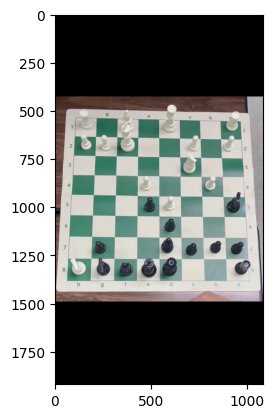

In [ ]:
# Read videos
import editdistance

f = open('chess_solution_final_seen.csv','r')
score = 0
n = 0
for line in f:
  video_name, moves_sol, p,link = line.split(',')
  moves = chess_move(video_name)
  s = 1 - editdistance.eval(moves,moves_sol)  / max(len(moves),len(moves_sol))
  score += s
  print(f"your result: ",moves)
  print(f"solution   : ",moves_sol )
  print(f"The edit distance between your results and solution is {s}.")
  n += 1
f.close()
if n != 0:
  print("-----------------------")
  print("Total score :",score/n)
  print("-----------------------")

